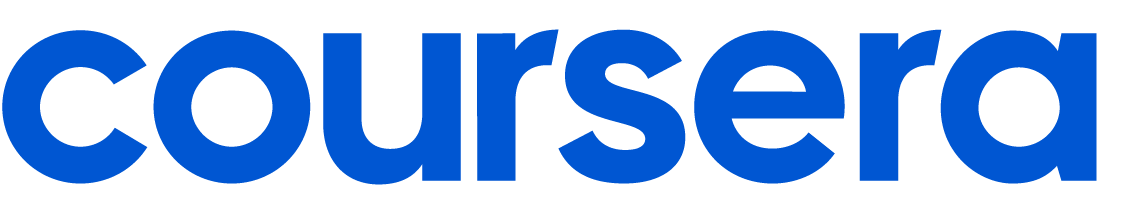

# Welcome to the Data Science Coding Challenge!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Import any other packages you may want to use
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit
from xgboost import XGBClassifier

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

# EDA

### Let's start by identifying all  numerical features 

In [6]:
# Define numeric features
numerical_cols = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 
            'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 
            'WatchlistSize', 'SupportTicketsPerMonth']

print(f"Number of numeric features: {len(numerical_cols)}")

Number of numeric features: 9


### Now we'll identify all categorical features and examine their distributions

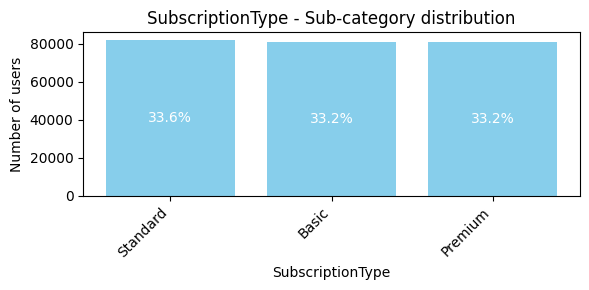

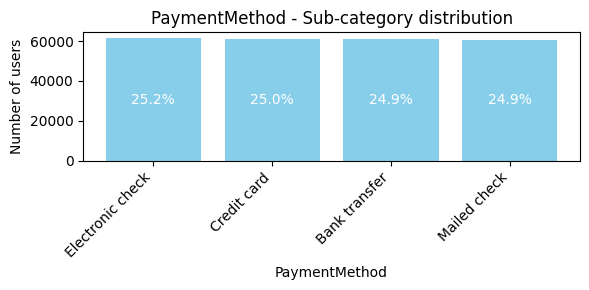

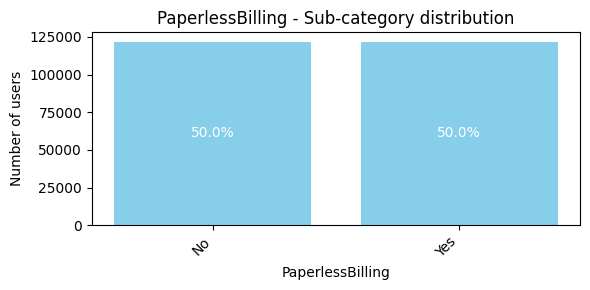

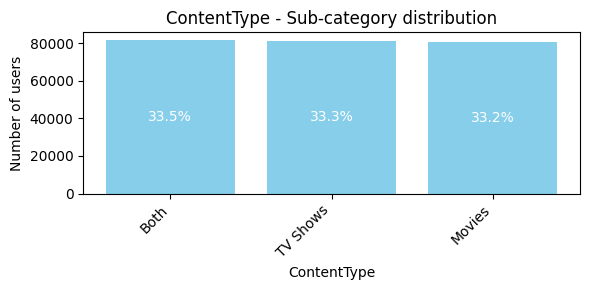

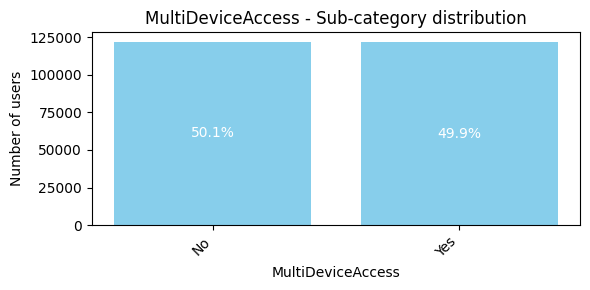

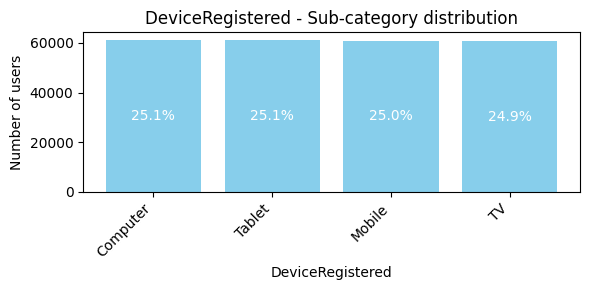

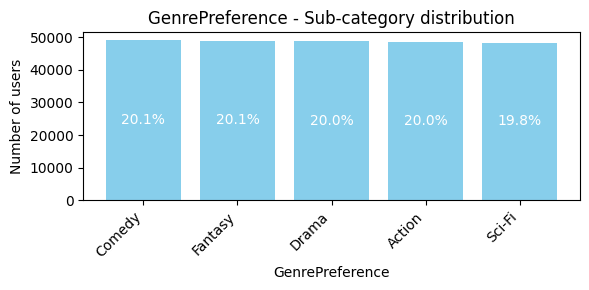

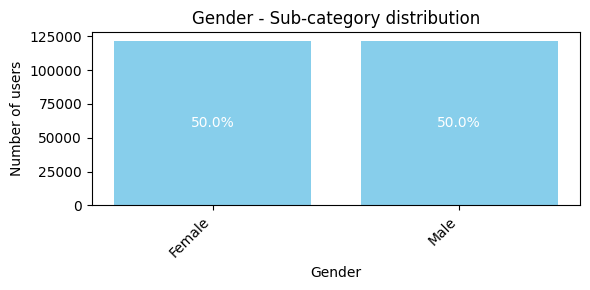

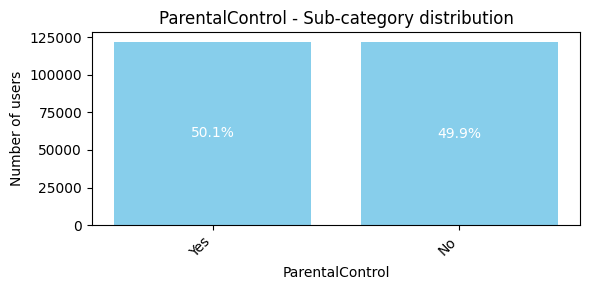

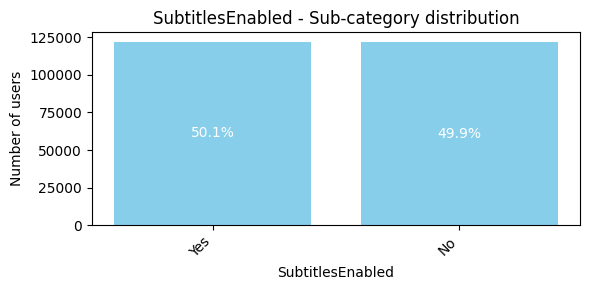

In [7]:
# List of categorical columns
cat_cols = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 
            'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 
            'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

# Loop through each categorical feature
for col in cat_cols:
    counts = train_df[col].value_counts()  # raw counts per sub-category
    total = counts.sum()                   # total users
    percentages = counts / total * 100     # convert to percentage
    
    plt.figure(figsize=(6,3))
    bars = plt.bar(counts.index, counts.values, color='skyblue')
    
    # Add percentage labels inside the bars
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%', 
                 ha='center', va='center', color='white', fontsize=10)
    
    plt.title(f"{col} - Sub-category distribution")
    plt.ylabel('Number of users')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Seems like the categorial features are evenly distributed. Let's check for any null values in the train set

In [8]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

### No null values!  We'll do the same for the test set

In [9]:
test_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

### Again, no null values. Let's check how common customer churn is

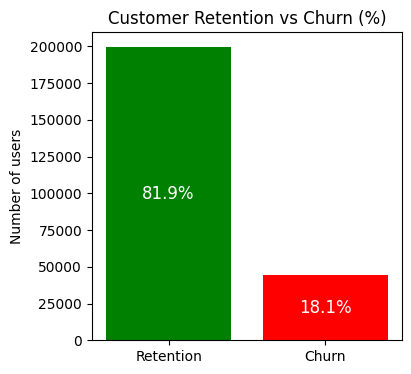

In [10]:
# Count churn vs retention
churn_counts = train_df['Churn'].value_counts()
total = churn_counts.sum()

# Percentages
percentages = churn_counts / total * 100

# Plot bars
fig, ax = plt.subplots(figsize=(4,4))
bars = ax.bar(['Retention', 'Churn'], [churn_counts[0], churn_counts[1]], color=['green', 'red'])

# Add percentages inside the bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2, f"{pct:.1f}%", ha='center', va='center', color='white', fontsize=12)

# Labels and title
ax.set_ylabel('Number of users')
ax.set_title('Customer Retention vs Churn (%)')

plt.show()


### Let's divide our training data by customer churn and explore the differences between the groups

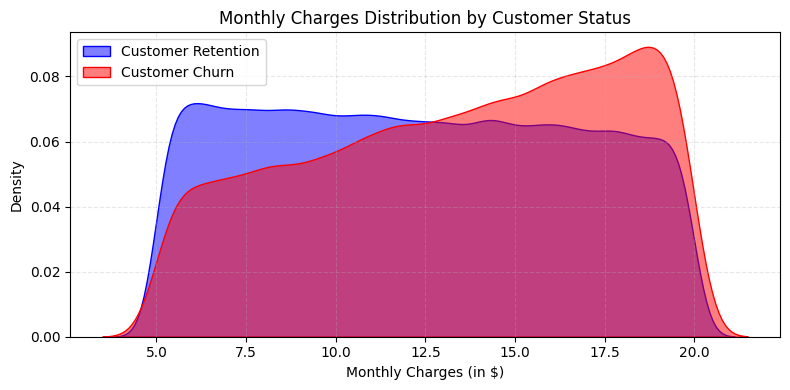

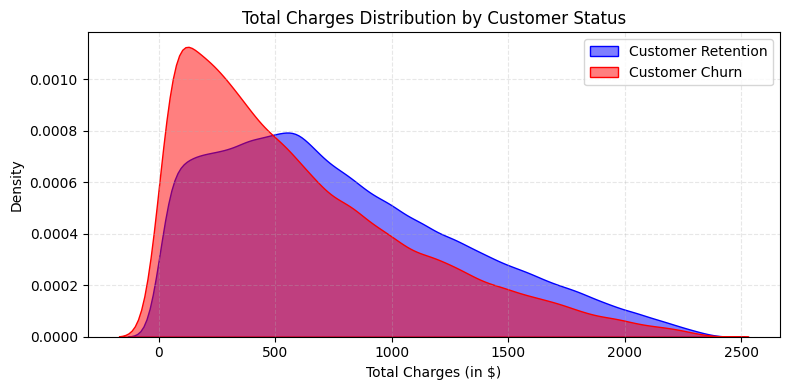

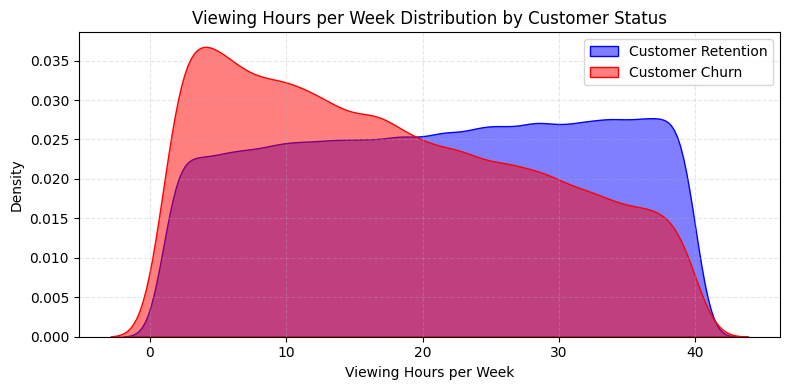

In [11]:
# Separate DataFrames for churned vs retained customers
customer_churn_df = train_df[train_df['Churn'] == 1]
customer_retention_df = train_df[train_df['Churn'] == 0]

# Define a helper function for KDE plots
def plot_kde(feature, title, x_label=None, retention_color='blue', churn_color='red'):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(customer_retention_df[feature], label='Customer Retention', fill=True, alpha=0.5, color=retention_color)
    sns.kdeplot(customer_churn_df[feature], label='Customer Churn', fill=True, alpha=0.5, color=churn_color)
    plt.title(title)
    plt.xlabel(x_label if x_label else feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot MonthlyCharges
plot_kde('MonthlyCharges', 'Monthly Charges Distribution by Customer Status', x_label='Monthly Charges (in $)')

# Plot TotalCharges
plot_kde('TotalCharges', 'Total Charges Distribution by Customer Status', x_label='Total Charges (in $)')

# Plot ViewingHoursPerWeek
plot_kde('ViewingHoursPerWeek', 'Viewing Hours per Week Distribution by Customer Status', x_label='Viewing Hours per Week')

### Without diving too deep into data analysis, we can draw these conclusions:

High Monthly Charges → Higher churn probability

Low Total Charges → Higher churn probability

Low Engagement (Viewing Hours) → Higher churn probability

# Now we'll prepare the data for model training!
### Let's first create our X and y train sets

In [6]:
# customerID doesn't hold any predictive value so we can ignore that column when training our model
X = train_df.drop(columns=['CustomerID', 'Churn'])

# create our target vector:
y = train_df['Churn']

### We'll add some ratio features that could prove useful for our model

In [7]:
# Charges per month, using account age
X['ChargesPerMonth'] = X['TotalCharges'] / (X['AccountAge'] + 1)

# Downloads per viewing hour
X['DownloadsPerHour'] = X['ContentDownloadsPerMonth'] / (X['ViewingHoursPerWeek'] + 1e-5)

# Support tickets per viewing hour
X['TicketsPerHour'] = X['SupportTicketsPerMonth'] / (X['ViewingHoursPerWeek'] + 1e-5)

### Convert all non-numeric features into numerical form and scale the data

In [8]:
# encode binary features:
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']
for col in binary_cols:
    X[col] = X[col].map({'Yes': 1, 'No': 0})
    X[col] = X[col].fillna(0).astype(int)

# one-hot encode for multi-class features
multi_cat_cols = ['SubscriptionType', 'DeviceRegistered', 'ContentType', 'GenrePreference', 'PaymentMethod', 'Gender']
X = pd.get_dummies(X, columns=multi_cat_cols, drop_first=True)

# scale numerical features using sklearn
num_cols = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 
            'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 
            'WatchlistSize', 'SupportTicketsPerMonth',
            'ChargesPerMonth', 'DownloadsPerHour', 'TicketsPerHour']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

### Lastly, we'll split the data into training and validation sets

In [9]:
# split into training and cross-validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Check the prepped data:

In [10]:
X_train.head()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_Movies,ContentType_TV Shows,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_Male
66000,1.426750,0.169132,1.320134,0,1,-0.319340,0.325968,1.143910,-1.417110,1.216976,...,True,False,False,False,False,False,False,False,False,False
133065,-1.548305,0.645115,-1.230736,1,0,-1.244157,-1.715652,0.797197,1.483772,-1.568014,...,True,False,False,False,True,False,False,True,False,True
210564,0.347564,-1.058765,-0.346624,1,1,0.756273,-0.177532,-0.728341,1.323031,-0.175519,...,False,False,False,False,True,False,False,False,True,True
156946,-1.460804,0.115645,-1.186890,1,0,-0.644455,-0.568358,1.421280,-1.566027,1.565099,...,False,True,True,False,False,False,True,False,False,False
125381,1.514252,0.752477,1.936513,0,0,-1.406463,-1.711836,1.074567,0.974264,-0.175519,...,False,False,False,False,False,False,False,False,True,True


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

### Let’s build and optimize our prediction model

Since the data is structured and tabular, an XGBoost model is expected to perform particularly well in this task.
First, let's try to find good hyperparameters for the model using Randomized Search:

In [30]:
# Create datasets for the Randomized Search:
X_combined = np.vstack((X_train, X_val))
y_combined = np.hstack((y_train, y_val))

# Predefined split for validation
test_fold = np.array([-1]*len(X_train) + [0]*len(X_val))
ps = PredefinedSplit(test_fold=test_fold)

# Create XGBoost model
test_model = XGBClassifier(
    eval_metric='auc',
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)


#  Define hyperparameter distribution 
param_dist = {
    'n_estimators': np.arange(100, 251, 25),    
    'max_depth': np.arange(3, 12),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'min_child_weight': np.arange(1, 10),
    'gamma': np.linspace(0, 5, 6)
}


# Randomized Search CV
rand_search_xgb = RandomizedSearchCV(
    estimator=test_model,
    param_distributions=param_dist,
    n_iter=50,          
    scoring='roc_auc',
    cv=ps,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run search
rand_search_xgb.fit(X_combined, y_combined)


# Print best hyperparameters and validation ROC-AUC
print("Best parameters:", rand_search_xgb.best_params_)
print("Best ROC-AUC on val set:", rand_search_xgb.best_score_)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
Best parameters: {'subsample': np.float64(0.9), 'n_estimators': np.int64(175), 'min_child_weight': np.int64(2), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.10666666666666666), 'gamma': np.float64(4.0), 'colsample_bytree': np.float64(0.6)}
Best ROC-AUC on val set: 0.7511182993607628


### Let’s create our model using the optimized hyperparameters and train it on the training set

In [11]:
# Creating our model with best hyperparameters
first_model = XGBClassifier(
    n_estimators=175,             
    max_depth=3,
    learning_rate=0.1067,
    subsample=0.9,
    colsample_bytree=0.6,
    min_child_weight=2,
    gamma=4.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# Train the model 
first_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-auc:0.67606
[1]	validation_0-auc:0.69804
[2]	validation_0-auc:0.69906
[3]	validation_0-auc:0.70753
[4]	validation_0-auc:0.71206
[5]	validation_0-auc:0.71668
[6]	validation_0-auc:0.71714
[7]	validation_0-auc:0.72018
[8]	validation_0-auc:0.72517
[9]	validation_0-auc:0.72818
[10]	validation_0-auc:0.72960
[11]	validation_0-auc:0.72999
[12]	validation_0-auc:0.73060
[13]	validation_0-auc:0.73150
[14]	validation_0-auc:0.73224
[15]	validation_0-auc:0.73338
[16]	validation_0-auc:0.73436
[17]	validation_0-auc:0.73463
[18]	validation_0-auc:0.73573
[19]	validation_0-auc:0.73722
[20]	validation_0-auc:0.73781
[21]	validation_0-auc:0.73822
[22]	validation_0-auc:0.73951
[23]	validation_0-auc:0.73999
[24]	validation_0-auc:0.74048
[25]	validation_0-auc:0.74091
[26]	validation_0-auc:0.74131
[27]	validation_0-auc:0.74172
[28]	validation_0-auc:0.74205
[29]	validation_0-auc:0.74236
[30]	validation_0-auc:0.74293
[31]	validation_0-auc:0.74312
[32]	validation_0-auc:0.74330
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


### Let's evaluate our model with a 0.5 threshold:

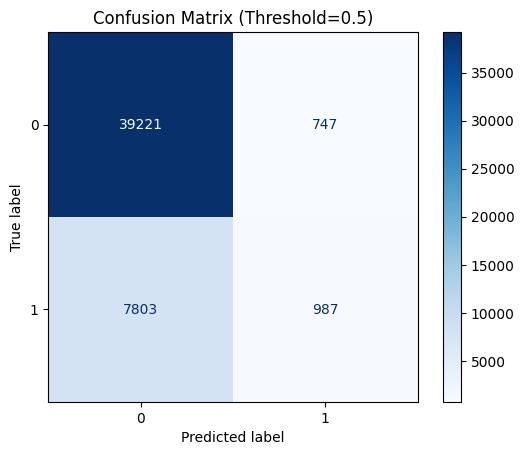

Validation Metrics:
ROC-AUC: 0.7512
Precision: 0.5692, Recall: 0.1123, F1: 0.1876
Log Loss: 0.4101


In [21]:
# Probabilities of churn
y_val_proba = first_model.predict_proba(X_val)[:, 1]  # [:,1] = probability of class 1 (churn)
threshold = 0.5
y_val_pred = (y_val_proba >= threshold).astype(int)

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# Binary metrics
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
loss = log_loss(y_val, y_val_proba)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

# Metrics
print(f"Validation Metrics:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")

### It's seems our model is too conservative..
The current model tends to favor the majority class (customers who didn’t churn, representing about 82% of the training set), causing us to miss roughly 90% of actual churners. To address this, we'll train a second model using class weighting to give more importance to customer churn during training.

In [15]:
# Calculate the scale_pos_weight for imbalance
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Create and train the XGBoost model with class balancing
second_model = XGBClassifier(
    n_estimators=175,             
    max_depth=3,
    learning_rate=0.1067,
    subsample=0.9,
    colsample_bytree=0.6,
    min_child_weight=2,
    gamma=4.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight  # <-- balances churn class
)

second_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)


[0]	validation_0-auc:0.67695
[1]	validation_0-auc:0.69940
[2]	validation_0-auc:0.70293
[3]	validation_0-auc:0.70710
[4]	validation_0-auc:0.71141
[5]	validation_0-auc:0.71606
[6]	validation_0-auc:0.71746
[7]	validation_0-auc:0.71995
[8]	validation_0-auc:0.72563
[9]	validation_0-auc:0.72878
[10]	validation_0-auc:0.73066
[11]	validation_0-auc:0.73109
[12]	validation_0-auc:0.73139
[13]	validation_0-auc:0.73260
[14]	validation_0-auc:0.73331
[15]	validation_0-auc:0.73439
[16]	validation_0-auc:0.73491
[17]	validation_0-auc:0.73547
[18]	validation_0-auc:0.73662
[19]	validation_0-auc:0.73777
[20]	validation_0-auc:0.73820
[21]	validation_0-auc:0.73809
[22]	validation_0-auc:0.73914
[23]	validation_0-auc:0.73968
[24]	validation_0-auc:0.74042
[25]	validation_0-auc:0.74056
[26]	validation_0-auc:0.74074
[27]	validation_0-auc:0.74106
[28]	validation_0-auc:0.74159
[29]	validation_0-auc:0.74211
[30]	validation_0-auc:0.74273
[31]	validation_0-auc:0.74296
[32]	validation_0-auc:0.74320
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


### Let's evaluate our second model (with the same threshold of 0.5)

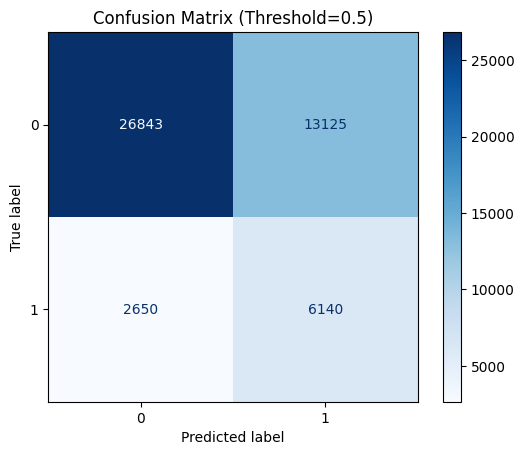

Validation Metrics:
ROC-AUC: 0.7515
Precision: 0.3187, Recall: 0.6985, F1: 0.4377
Log Loss: 0.5919


In [20]:
# Probabilities of churn
y_val_proba = second_model.predict_proba(X_val)[:, 1]  # [:,1] = probability of class 1 (churn)
threshold = 0.5
y_val_pred = (y_val_proba >= threshold).astype(int)

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# Binary metrics
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
loss = log_loss(y_val, y_val_proba)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

# Metrics
print(f"Validation Metrics:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")

### Which model should we use?
In the second model, the ROC-AUC remains virtually unchanged (0.7512 → 0.7515), but Recall has increased dramatically from 0.1123 to 0.6985 - an improvement of nearly 58%. This comes with a substantial decrease in Precision, from 0.5692 down to 0.3187.

From a business perspective, correctly identifying customers who are likely to churn is far more important than misclassifying loyal customers, so I consider this trade-off worthwhile. Even though Precision decreases, the large gain in Recall means we can proactively target a much larger portion of potential churners.

### Now, let's prepare the test data for our model (in the same way we prepared the training data)

In [17]:
# Copy the test dataframe
X_test_final = test_df.copy()

# Create ratio features (same as training)
X_test_final['ChargesPerMonth'] = X_test_final['TotalCharges'] / (X_test_final['AccountAge'] + 1)
X_test_final['DownloadsPerHour'] = X_test_final['ContentDownloadsPerMonth'] / (X_test_final['ViewingHoursPerWeek'] + 1e-5)
X_test_final['TicketsPerHour'] = X_test_final['SupportTicketsPerMonth'] / (X_test_final['ViewingHoursPerWeek'] + 1e-5)

# Encode binary features (same as training)
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']
for col in binary_cols:
    X_test_final[col] = X_test_final[col].map({'Yes': 1, 'No': 0})
    X_test_final[col] = X_test_final[col].fillna(0).astype(int)

# One-hot encode multi-class features (same columns as training)
multi_cat_cols = ['SubscriptionType', 'DeviceRegistered', 'ContentType', 
                  'GenrePreference', 'PaymentMethod', 'Gender']
X_test_final = pd.get_dummies(X_test_final, columns=multi_cat_cols, drop_first=True)

# Align columns with training data (missing columns filled with 0)
X_test_final = X_test_final.reindex(columns=X_train.columns, fill_value=0)

# Scale numerical features using the same scaler as training
num_cols = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 
            'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 
            'WatchlistSize', 'SupportTicketsPerMonth',
            'ChargesPerMonth', 'DownloadsPerHour', 'TicketsPerHour']
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])


### Check the prepped test data

In [30]:
X_test_final.head()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_Movies,ContentType_TV Shows,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_Male
0,-0.644122,1.242876,-0.137084,0,0,0.767017,0.594196,1.213252,0.450126,-0.871766,...,False,True,True,False,False,False,False,False,True,True
1,0.493400,-0.595673,0.023990,1,0,1.456060,-0.696379,1.282595,-0.849307,-0.871766,...,False,True,False,False,False,False,False,True,False,False
2,-1.606640,0.584230,-1.291688,0,1,-1.147346,0.953367,-0.728341,1.561050,-0.871766,...,False,True,False,False,False,True,False,False,False,False
3,0.814239,0.662424,1.148428,0,1,1.341570,1.677817,-0.728341,1.680308,-1.568014,...,False,False,True,False,False,False,False,True,False,False
4,0.901741,-0.019563,0.723051,1,1,0.266946,-0.434722,-1.283082,-0.134890,0.520728,...,False,True,False,True,False,False,True,False,False,False


### Make our prediciton using the second model and prepare the submission file

In [48]:
# Predict probability of churn (class 1)
test_pred_proba = second_model.predict_proba(X_test_final)[:, 1]

# Build final dataframe for submission
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': test_pred_proba
})

# Show predicition shape and values
print(prediction_df.shape)
prediction_df.head()


(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.409408
1,LFR4X92X8H,0.165164
2,QM5GBIYODA,0.738686
3,D9RXTK2K9F,0.181859
4,ENTCCHR1LR,0.486111


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [49]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [50]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [51]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [52]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [53]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!